# **Selected Socioeconomic Indicators in Chicago**

The city of Chicago released a dataset of socioeconomic data to the Chicago City Portal.
This dataset contains a selection of six socioeconomic indicators of public health significance and a “hardship index,” for each Chicago community area, for the years 2008 – 2012.

Scores on the hardship index can range from 1 to 100, with a higher index number representing a greater level of hardship.

A detailed description of the dataset can be found on [the city of Chicago's website](https://data.cityofchicago.org/Health-Human-Services/Census-Data-Selected-socioeconomic-indicators-in-C/kn9c-c2s2?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDB0201ENSkillsNetwork20127838-2021-01-01), but to summarize, the dataset has the following variables:

*   **Community Area Number** (`ca`): Used to uniquely identify each row of the dataset

*   **Community Area Name** (`community_area_name`): The name of the region in the city of Chicago

*   **Percent of Housing Crowded** (`percent_of_housing_crowded`): Percent of occupied housing units with more than one person per room

*   **Percent Households Below Poverty** (`percent_households_below_poverty`): Percent of households living below the federal poverty line

*   **Percent Aged 16+ Unemployed** (`percent_aged_16_unemployed`): Percent of persons over the age of 16 years that are unemployed

*   **Percent Aged 25+ without High School Diploma** (`percent_aged_25_without_high_school_diploma`): Percent of persons over the age of 25 years without a high school education

*   **Percent Aged Under** 18 or Over 64:Percent of population under 18 or over 64 years of age (`percent_aged_under_18_or_over_64`): (ie. dependents)

*   **Per Capita Income** (`per_capita_income_`): Community Area per capita income is estimated as the sum of tract-level aggragate incomes divided by the total population

*   **Hardship Index** (`hardship_index`): Score that incorporates each of the six selected socioeconomic indicators

In this Lab, we'll take a look at the variables in the socioeconomic indicators dataset and do some basic analysis with Python.

### **Importing Required Libraries** 

In [27]:
import sqlite3,csv,pandas as pd
import matplotlib.pyplot as plt,seaborn as sns

In [2]:
%load_ext sql

### **Connect To The DataBase**

In [3]:
conn=sqlite3.connect("socioeconomic.db")

In [7]:
%sql sqlite:///socioeconomic.db

### **Store Data From CSV File To Database**

In [4]:
df1=pd.read_csv('https://data.cityofchicago.org/resource/jcxq-k9xf.csv')

df1.to_sql("chicago_socioeconomic_data",conn,if_exists='replace',index=False,method='multi')

78

In [8]:
%sql select * from chicago_socioeconomic_data limit 5;

   sqlite:///
 * sqlite:///socioeconomic.db
Done.


ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


### **How many rows are in the dataset?**


In [9]:
%sql select count(*) from chicago_socioeconomic_data

   sqlite:///
 * sqlite:///socioeconomic.db
Done.


count(*)
78


### **How many community areas in Chicago have a hardship index greater than 50.0?**

In [11]:
%sql select count(*) from chicago_socioeconomic_data where hardship_index >50.0

   sqlite:///
 * sqlite:///socioeconomic.db
Done.


count(*)
38


### **What is the maximum value of hardship index in this dataset?**

In [13]:
%sql select max(hardship_index) from chicago_socioeconomic_data

   sqlite:///
 * sqlite:///socioeconomic.db
Done.


max(hardship_index)
98.0


 ### **Which community area which has the highest hardship index?**

In [16]:
%sql select max(hardship_index),community_area_name from chicago_socioeconomic_data group by community_area_name order by max(hardship_index) desc limit 1

   sqlite:///
 * sqlite:///socioeconomic.db
Done.


max(hardship_index),community_area_name
98.0,Riverdale


### **Which Chicago community areas have per-capita incomes greater than $60,000?**

In [18]:
%sql select sum(per_capita_income_),community_area_name from chicago_socioeconomic_data group by community_area_name having per_capita_income_ > 60000

   sqlite:///
 * sqlite:///socioeconomic.db
Done.


sum(per_capita_income_),community_area_name
60058,Lake View
71551,Lincoln Park
65526,Loop
88669,Near North Side


### **Create a scatter plot using the variables per_capita_income_ and hardship_index. Explain the correlation between the two variables.**

In [21]:
data = %sql select per_capita_income_, hardship_index from chicago_socioeconomic_data

   sqlite:///
 * sqlite:///socioeconomic.db
Done.


In [26]:
df2=data.DataFrame()


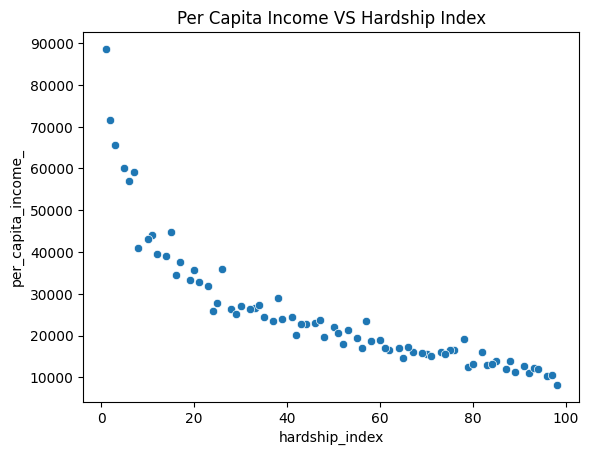

In [34]:
sns.scatterplot(x='hardship_index',y='per_capita_income_',data=df2)
plt.title("Per Capita Income VS Hardship Index")
plt.show()

**PerCapitaIncome VS HardshipIndex shows an Inversse Correlation**

### **Per Capita Income VS Percent Households Below Poverty VS Percent Aged 16+ Unemployed**

In [35]:
data = %sql select per_capita_income_, percent_households_below_poverty,percent_aged_16_unemployed from chicago_socioeconomic_data

   sqlite:///
 * sqlite:///socioeconomic.db
Done.


In [36]:
df3=data.DataFrame()

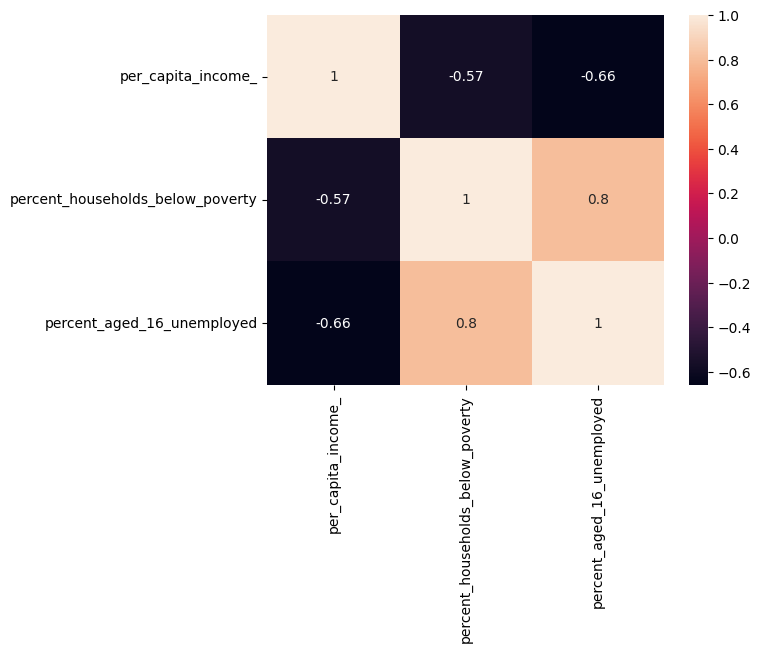

In [43]:
sns.heatmap(df3.corr(),annot=True)
plt.show()

1. **As assumed `percent_households_below_poverty` and `percent_aged_16_unemployed` have strong positive correlation**
2. **`percent_households_below_poverty` and `percent_aged_16_unemployed` are moderately -ve correlated with `per_capita_income_`**

In [44]:
conn.close()